# Get all the playlists of the current user and analyse the tracks inside the playlist

In [3]:
import json
from requests import post, get
import base64
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

CLIENT_ID = "d149816553324aa1a4e335d83f05bbcb"
CLIENT_SECRET = "54ade9c1100349feb994eb3ef4da6ce9"
USERNAME="manzl017"
redirect_uri="https://google.com"
scope="user-read-private user-read-email user-library-read playlist-read-private playlist-read-collaborative"

RAPID_ANALYSIS_TOKEN = "8d3ce1ac10msheb93b58121f294cp12f400jsndb93cef60765"

def tokenByClientCredentials():
    auth_string = CLIENT_ID + ":" + CLIENT_SECRET
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization" : "Basic " + auth_base64,
        "Content-Type" : "application/x-www-form-urlencoded"
    } 
    data = {"grant_type" : "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def tokenByAuthorizationCode():
    spoti = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))
    token = util.prompt_for_user_token(USERNAME, scope, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=redirect_uri)
    return token

# generate Token
userToken = tokenByAuthorizationCode()
headers = {
        "Authorization" : "Bearer " + userToken
}

def getDataByUrl(url):
    result = get(url, headers=headers)
    data = result.json()
    return data
    
def getTrackAnalysis(trackId, token):
    url = "https://track-analysis.p.rapidapi.com/pktx/spotify/" + trackId
    headers = {
        "x-rapidapi-host" : "track-analysis.p.rapidapi.com",
    	"x-rapidapi-key" : token
    }
    result = get(url, headers=headers)
    data = result.json()
    return data

def getUserProfile():
    url = "https://api.spotify.com/v1/me"
    result = get(url, headers=headers)
    data = result.json()
    return data


def getUserPlaylists(userId):
    url = "https://api.spotify.com/v1/me/playlists"
    result = get(url, headers=headers)
    data = result.json()
    return data

In [24]:
myProfile = getUserProfile()
userId = myProfile["id"]
myPlaylists = getUserPlaylists(userId)

In [25]:
playlists = myPlaylists["items"]
dfPlaylists = pd.DataFrame(playlists)
dfPlaylists.columns

dfPlaylists["name"]

0                                             Chill DnB
1                      Dance Hits 2000 - 2025 (Top 100)
2                          Beatport Best New Tech House
3     Beatport Best New Electro (Modern / Classic / ...
4                         Beatport Best New Drum & Bass
5                              Beatport Top 100 - Today
6                                               Käule 6
7                                                    🔥 
8                                    Volleyball Gamemix
9                         playlist full of home runs ✨ 
10                                             Vorglühn
11                                         MelodicHouse
12                                            TechHouse
13                                           PartyVibes
14                                               Tekkno
15                                                  DnB
16                                          SummerVibes
17                                       Volleyb

In [36]:
#build dataframe
tracksPlaylistsDf = pd.DataFrame()

for playlist in playlists:
    href = playlist["tracks"]["href"]  
    tracksArray = getDataByUrl(href + "?limit=100")["items"] #limit 100
    tracksDf = pd.DataFrame(tracksArray)
    #todo: trackanalysis hinzufügen
    tracksDf["ownerId"] = playlist["owner"]["id"]
    tracksDf["playlistId"] = playlist["id"]
    tracksDf["playlistName"] = playlist["name"]
    tracksPlaylistsDf = pd.concat([tracksPlaylistsDf, tracksDf],ignore_index=True)

In [37]:
tracksPlaylistsDf.drop(["added_at", "is_local", "primary_color", "added_by", "video_thumbnail"], axis = 1, inplace=True)

#add for the columns with null vaules
tracksPlaylistsDf["trackId"] = {}
tracksPlaylistsDf["albumId"] = {}
tracksPlaylistsDf["trackName"] = {}
tracksPlaylistsDf["albumName"] = {}
tracksPlaylistsDf["analysis"] = {}

tracksPlaylistsDf

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis
0,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,NaN,NaN,NaN,NaN,NaN
1,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,NaN,NaN,NaN,NaN,NaN
2,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,NaN,NaN,NaN,NaN,NaN
3,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,NaN,NaN,NaN,NaN,NaN
4,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1866,"{'preview_url': None, 'available_markets': [],...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,NaN,NaN,NaN,NaN,NaN
1867,"{'preview_url': None, 'available_markets': ['C...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,NaN,NaN,NaN,NaN,NaN
1868,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,NaN,NaN,NaN,NaN,NaN
1869,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,NaN,NaN,NaN,NaN,NaN


In [38]:
#add values
for idx, track in enumerate(tracksPlaylistsDf["track"]):
    trackId = track["id"]
    tracksPlaylistsDf.at[idx, "trackId"] = trackId
    tracksPlaylistsDf.at[idx, "albumId"] = track["album"]["id"]
    tracksPlaylistsDf.at[idx, "trackName"] = track["name"]
    tracksPlaylistsDf.at[idx, "albumName"] = track["album"]["name"]
    #try:
    #    data = getTrackAnalysis(trackId, RAPID_ANALYSIS_TOKEN)
    #    print(data)
    #except:
    #    print(trackId)
    tracksPlaylistsDf.at[idx, "analysis"] = data
    time.sleep(0.2)
    

tracksPlaylistsDf

{'id': 'c7349d1fc465d97f4a797d9abb40ec71', 'key': 'F♯', 'mode': 'minor', 'camelot': '11A', 'tempo': 157, 'duration': '2:16', 'popularity': 65, 'energy': 60, 'danceability': 74, 'happiness': 49, 'acousticness': 1, 'instrumentalness': 0, 'liveness': 9, 'speechiness': 36, 'loudness': '-7 dB'}
{'id': 'f4b8e5d481eb013573df00191c75bfc2', 'key': 'F', 'mode': 'minor', 'camelot': '4A', 'tempo': 87, 'duration': '4:30', 'popularity': 15, 'energy': 86, 'danceability': 57, 'happiness': 25, 'acousticness': 0, 'instrumentalness': 6, 'liveness': 5, 'speechiness': 6, 'loudness': '-6 dB'}
{'id': '7bccac019882f2cc38b107b17956f100', 'key': 'F', 'mode': 'major', 'camelot': '7B', 'tempo': 69, 'duration': '2:50', 'popularity': 48, 'energy': 35, 'danceability': 56, 'happiness': 72, 'acousticness': 39, 'instrumentalness': 0, 'liveness': 53, 'speechiness': 25, 'loudness': '-8 dB'}
{'id': 'b2570a0216f1d39c4f3a38e88868df59', 'key': 'A♯', 'mode': 'minor', 'camelot': '3A', 'tempo': 170, 'duration': '5:09', 'popular

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis
0,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,5mfGEs5n647v4WE3K5YmBy,4AueWk2dGXqbMFx7ogEAs7,on & on,froge.mp3,"{'id': 'c7349d1fc465d97f4a797d9abb40ec71', 'ke..."
1,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,4jU68Q6v6T9X20BkAOmkdl,3rkDVLp160koyHgcqTTEtG,Circuit Prayer,Circuit Prayer / Left Apart,"{'id': 'f4b8e5d481eb013573df00191c75bfc2', 'ke..."
2,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0anzk9DJml4XHI8z8937hy,6UjpjuVBiV1Qd9lFRlh09L,You Don't Have To Wait (feat. En Mute),You Don't Have To Wait (feat. En Mute),"{'id': '7bccac019882f2cc38b107b17956f100', 'ke..."
3,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,2vSxvtSm3h5MmkBSyw9Dch,28gaZp0UrHrzr3fi8gwIxH,In Love Again,In Love Again,"{'id': 'b2570a0216f1d39c4f3a38e88868df59', 'ke..."
4,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0tVowlEPcNQbGxZWYZh93w,4wR4t1d5wEMg6kCFoXZmMw,Coming Down - Etherwood Remix,Coming Down (Etherwood Remix),"{'id': '6242a47eac6a8f882afbd5ad5be674da', 'ke..."
...,...,...,...,...,...,...,...,...,...
1866,"{'preview_url': None, 'available_markets': [],...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,0JhKJg5ejeQ8jq89UQtnw8,4mkvtXQd6rD7zuAHhexEvb,Levels - Radio Edit,Levels,"{'id': 'd6e466d049b4061282b9636b463934a7', 'ke..."
1867,"{'preview_url': None, 'available_markets': ['C...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,5p3SJ3CYqrmFbboAtfNo5n,5bRrEsH3Mjl8O0lpUgdIHI,Memories (feat. Kid Cudi),One More Love,"{'id': '8058353623cbe65fa20501e841c279fd', 'na..."
1868,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,1VSuFS7PahCN3SWbOcQ98m,57lgFncHBYu5E3igZnuCJK,forget me too (feat. Halsey),Tickets To My Downfall,"{'id': '15bd13bd1e96c0380c6adb9e7f9b9cbd', 'ke..."
1869,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,11ckOzqGFuO63cTmkCuaLm,0mRMduZ5yWZ1YMhIQKLpN4,Come & Go (with Marshmello),Come & Go (with Marshmello),"{'id': 'd647df84e98e3fc2c943c7eacd860b6e', 'ke..."


In [39]:
#tracksPlaylistsDf.to_json('playlists_tracks_.json', orient='records')

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis
0,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,5mfGEs5n647v4WE3K5YmBy,4AueWk2dGXqbMFx7ogEAs7,on & on,froge.mp3,"{'id': 'c7349d1fc465d97f4a797d9abb40ec71', 'ke..."
1,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,4jU68Q6v6T9X20BkAOmkdl,3rkDVLp160koyHgcqTTEtG,Circuit Prayer,Circuit Prayer / Left Apart,"{'id': 'f4b8e5d481eb013573df00191c75bfc2', 'ke..."
2,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0anzk9DJml4XHI8z8937hy,6UjpjuVBiV1Qd9lFRlh09L,You Don't Have To Wait (feat. En Mute),You Don't Have To Wait (feat. En Mute),"{'id': '7bccac019882f2cc38b107b17956f100', 'ke..."
3,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,2vSxvtSm3h5MmkBSyw9Dch,28gaZp0UrHrzr3fi8gwIxH,In Love Again,In Love Again,"{'id': 'b2570a0216f1d39c4f3a38e88868df59', 'ke..."
4,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0tVowlEPcNQbGxZWYZh93w,4wR4t1d5wEMg6kCFoXZmMw,Coming Down - Etherwood Remix,Coming Down (Etherwood Remix),"{'id': '6242a47eac6a8f882afbd5ad5be674da', 'ke..."
...,...,...,...,...,...,...,...,...,...
1866,"{'preview_url': None, 'available_markets': [],...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,0JhKJg5ejeQ8jq89UQtnw8,4mkvtXQd6rD7zuAHhexEvb,Levels - Radio Edit,Levels,"{'id': 'd6e466d049b4061282b9636b463934a7', 'ke..."
1867,"{'preview_url': None, 'available_markets': ['C...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,5p3SJ3CYqrmFbboAtfNo5n,5bRrEsH3Mjl8O0lpUgdIHI,Memories (feat. Kid Cudi),One More Love,"{'id': '8058353623cbe65fa20501e841c279fd', 'na..."
1868,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,1VSuFS7PahCN3SWbOcQ98m,57lgFncHBYu5E3igZnuCJK,forget me too (feat. Halsey),Tickets To My Downfall,"{'id': '15bd13bd1e96c0380c6adb9e7f9b9cbd', 'ke..."
1869,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,11ckOzqGFuO63cTmkCuaLm,0mRMduZ5yWZ1YMhIQKLpN4,Come & Go (with Marshmello),Come & Go (with Marshmello),"{'id': 'd647df84e98e3fc2c943c7eacd860b6e', 'ke..."


In [42]:
df['analysis'][0]

{'id': 'c7349d1fc465d97f4a797d9abb40ec71',
 'key': 'F♯',
 'mode': 'minor',
 'camelot': '11A',
 'tempo': 157,
 'duration': '2:16',
 'popularity': 65,
 'energy': 60,
 'danceability': 74,
 'happiness': 49,
 'acousticness': 1,
 'instrumentalness': 0,
 'liveness': 9,
 'speechiness': 36,
 'loudness': '-7 dB'}

In [41]:
tracksPlaylistsDf["playlistName"].value_counts()

playlistName
Dance Hits 2000 - 2025 (Top 100)                          100
Beatport Best New Tech House                              100
Beatport Best New Drum & Bass                             100
Beatport Best New Electro (Modern / Classic / Detroit)    100
Volleyball Gamemix                                        100
playlist full of home runs ✨                              100
PartyVibes                                                100
Motivation Music 2025                                     100
SummerVibes                                               100
Motivations Mix                                           100
EDM                                                       100
DnB                                                       100
Zugfahren                                                  85
Beatport Top 100 - Today                                   85
Käule 6                                                    81
Ballerman                                                

In [15]:
tracksPlaylistsDf["trackId"].nunique()

1771

In [17]:
tracksPlaylistsDf["trackId"].count()

np.int64(1871)

In [18]:
tracksPlaylistsDf["albumName"].value_counts()

albumName
Brennan Heart & Friends               16
Hardwell Presents Revealed, Vol. 9     9
Layers                                 5
Lost                                   5
beerbongs & bentleys                   5
                                      ..
Silence (Illenium Remix)               1
Alone, Pt. II                          1
The Marshall Mathers LP                1
Popcorn (GATTÜSO Remix)                1
Misery Business                        1
Name: count, Length: 1620, dtype: int64

In [19]:
tracksPlaylistsDf[tracksPlaylistsDf['albumName'] == "Brennan Heart & Friends"].loc[ : , 'playlistName':]

,playlistName,trackId,albumId,trackName,albumName,analysis
1748,EDM,02Ga2Wm48J4jlXyl3epw56,4wkYuAZysC3pGnqMeHYA2A,Journey,Brennan Heart & Friends,NaN
1752,EDM,2UnT0N4kOlmx1Bi5ASivdL,4wkYuAZysC3pGnqMeHYA2A,Everything We Are,Brennan Heart & Friends,NaN
1753,EDM,2MbrobssYfmPNvZtSmdU9t,4wkYuAZysC3pGnqMeHYA2A,Katana,Brennan Heart & Friends,NaN
1754,EDM,1GenPdoR40cmoS90Nx8A9u,4wkYuAZysC3pGnqMeHYA2A,Addicted To The Bass,Brennan Heart & Friends,NaN
1755,EDM,5hG2ZvkMjgaUt8ajjPmjx7,4wkYuAZysC3pGnqMeHYA2A,When Tomorrow Comes,Brennan Heart & Friends,NaN
1756,EDM,7Ef9F0u5sXpz2qf4rq3qoT,4wkYuAZysC3pGnqMeHYA2A,Heroes & Legends,Brennan Heart & Friends,NaN
1757,EDM,0wBAuPRDaurDBZ8ZfIA5yI,4wkYuAZysC3pGnqMeHYA2A,Take Your Pain (feat. Armen Paul),Brennan Heart & Friends,NaN
1758,EDM,5XSwR4hZ0nY4HEuWG81pT2,4wkYuAZysC3pGnqMeHYA2A,Stand Together (feat. Mikel Franco),Brennan Heart & Friends,NaN
1759,EDM,0gaCBO13FzHvHayORq4PHr,4wkYuAZysC3pGnqMeHYA2A,Time Is Now (I AM HARDSTYLE In Concert Theme),Brennan Heart & Friends,NaN
1760,EDM,72gbWRPK3743mzNCTVBsg5,4wkYuAZysC3pGnqMeHYA2A,Untouchable,Brennan Heart & Friends,NaN


In [20]:
tracksPlaylistsDf[tracksPlaylistsDf['ownerId'] == "5ha8mupe4kz2xlrf8dpr7llxd"].loc[ : , 'playlistName':].tail()

,playlistName,trackId,albumId,trackName,albumName,analysis
835,Vorglühn,5ls4FQAoSlAFPFnaYpeyhn,5LdsLkZqLq2oUEthzHiR9g,Frikitona,Frikitona,NaN
836,Vorglühn,6ryWXzeSbDX5cebOrgjMKL,5toviX45fuHcs6yy9HhZs2,"World, Hold On - FISHER Rework","World, Hold On (FISHER Rework)",NaN
837,Vorglühn,1Whq5PzDHie78rKbf88zpo,2uBTBkJk8S4Smr9gDDCAqE,Guataqui - Dosh Remix,Guataqui (Dosh Remix),NaN
838,Vorglühn,1TAWywmhj68rLpor3w8J0X,6rqFLZcRn19VEwRQ6ERBFS,Aguila (feat. Cumbiafrica),Aguila (feat. Cumbiafrica),NaN
839,Vorglühn,5vx3XZNWCSIIhKmsutYbn5,6698Mk1lSINKTqduFka8El,Blaze,Blaze,NaN


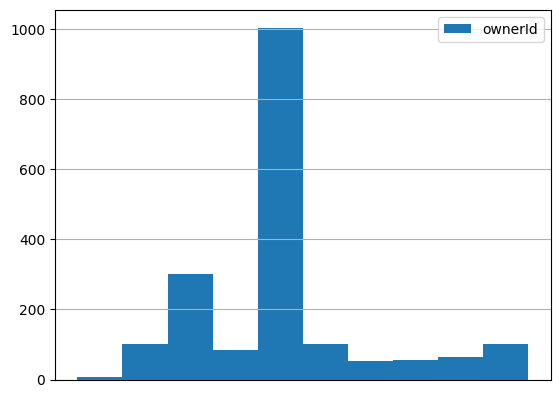

In [21]:
tracksPlaylistsDf["ownerId"].hist(legend=True)

plt.xticks(ticks=[])
plt.show()

In [22]:
tracksPlaylistsDf["ownerId"].value_counts()

ownerId
manzl017                        1004
beatportprofile                  300
yeahthejacko                     100
t8w9dojs72e99167uwmde65tp        100
lithuaniahq                      100
317j7n6nrjhmndfpji3m75372mpm      85
119701354                         65
guenther-patrick                  56
5ha8mupe4kz2xlrf8dpr7llxd         53
1116890534                         8
Name: count, dtype: int64

In [4]:
df = pd.read_json('playlists_tracks.json', orient='records')
df[df["trackId"]== "5UI846kakgl3TCjjnS2kdg"]

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis
56,"{'preview_url': None, 'available_markets': ['A...",t8w9dojs72e99167uwmde65tp,04EKmJhBK8dLL6SONP5dyq,Dance Hits 2000 - 2025 (Top 100),5UI846kakgl3TCjjnS2kdg,1K4bnbCGdls1tHDR4oLWSC,All Around Me - Majed Remix,All Around Me (Majed Remix),"{'id': '1c5c882512969c99eeffb2ed3e3f9435', 'na..."


In [5]:
df_new = pd.DataFrame()
test = 0

for index, row in df.iterrows():
    df_new.at[index, "playlistName"] = row.get("playlistName")
    try:
        danceability = row.get("analysis")["danceability"]
        popularity = row.get("analysis")["popularity"]
        happiness = row.get("analysis")["happiness"]
        liveness = row.get("analysis")["liveness"]
        tempo = row.get("analysis")["tempo"]
        df_new.at[index, "danceability"] = danceability
        df_new.at[index, "popularity"] = popularity
        df_new.at[index, "happiness"] = happiness
        df_new.at[index, "liveness"] = liveness
        df_new.at[index, "tempo"] = tempo
    except:
        continue
    #df_new.at[index, "danceability"] = row.get("analysis")
df_new.groupby("playlistName").mean().sort_values(by="danceability")

,danceability,popularity,happiness,liveness,tempo
playlistName,,,,,
DnB,49.480000,44.120000,26.530000,21.190000,155.830000
EDM,54.140000,43.330000,29.790000,22.830000,134.370000
Chill DnB,55.750000,30.875000,27.875000,15.750000,126.000000
Songs to sing,57.729730,69.216216,42.000000,14.729730,121.648649
Beatport Best New Drum & Bass,59.111111,29.311111,33.488889,22.388889,137.411111
Motivations Mix,62.650000,66.540000,52.710000,21.300000,126.560000
Gute Laune,63.470588,42.764706,60.058824,19.235294,132.000000
Henning and Co,64.250000,51.700000,52.150000,27.300000,113.400000
Motivation Music 2025,65.397849,42.075269,44.967742,20.731183,135.086022


In [16]:
df = pd.read_json('playlists_tracks.json', orient='records')
df

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis
0,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,5mfGEs5n647v4WE3K5YmBy,4AueWk2dGXqbMFx7ogEAs7,on & on,froge.mp3,"{'id': 'c7349d1fc465d97f4a797d9abb40ec71', 'ke..."
1,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,4jU68Q6v6T9X20BkAOmkdl,3rkDVLp160koyHgcqTTEtG,Circuit Prayer,Circuit Prayer / Left Apart,"{'id': 'f4b8e5d481eb013573df00191c75bfc2', 'ke..."
2,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0anzk9DJml4XHI8z8937hy,6UjpjuVBiV1Qd9lFRlh09L,You Don't Have To Wait (feat. En Mute),You Don't Have To Wait (feat. En Mute),"{'id': '7bccac019882f2cc38b107b17956f100', 'ke..."
3,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,2vSxvtSm3h5MmkBSyw9Dch,28gaZp0UrHrzr3fi8gwIxH,In Love Again,In Love Again,"{'id': 'b2570a0216f1d39c4f3a38e88868df59', 'ke..."
4,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0tVowlEPcNQbGxZWYZh93w,4wR4t1d5wEMg6kCFoXZmMw,Coming Down - Etherwood Remix,Coming Down (Etherwood Remix),"{'id': '6242a47eac6a8f882afbd5ad5be674da', 'ke..."
...,...,...,...,...,...,...,...,...,...
1866,"{'preview_url': None, 'available_markets': [],...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,0JhKJg5ejeQ8jq89UQtnw8,4mkvtXQd6rD7zuAHhexEvb,Levels - Radio Edit,Levels,"{'id': 'd6e466d049b4061282b9636b463934a7', 'ke..."
1867,"{'preview_url': None, 'available_markets': ['C...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,5p3SJ3CYqrmFbboAtfNo5n,5bRrEsH3Mjl8O0lpUgdIHI,Memories (feat. Kid Cudi),One More Love,"{'id': '8058353623cbe65fa20501e841c279fd', 'na..."
1868,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,1VSuFS7PahCN3SWbOcQ98m,57lgFncHBYu5E3igZnuCJK,forget me too (feat. Halsey),Tickets To My Downfall,"{'id': '15bd13bd1e96c0380c6adb9e7f9b9cbd', 'ke..."
1869,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,11ckOzqGFuO63cTmkCuaLm,0mRMduZ5yWZ1YMhIQKLpN4,Come & Go (with Marshmello),Come & Go (with Marshmello),"{'id': 'd647df84e98e3fc2c943c7eacd860b6e', 'ke..."


In [17]:
df["_id"] = df["trackId"] + df["playlistId"]
df

,track,ownerId,playlistId,playlistName,trackId,albumId,trackName,albumName,analysis,_id
0,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,5mfGEs5n647v4WE3K5YmBy,4AueWk2dGXqbMFx7ogEAs7,on & on,froge.mp3,"{'id': 'c7349d1fc465d97f4a797d9abb40ec71', 'ke...",5mfGEs5n647v4WE3K5YmBy62UIryS6g5Fa0fvlrAzV6P
1,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,4jU68Q6v6T9X20BkAOmkdl,3rkDVLp160koyHgcqTTEtG,Circuit Prayer,Circuit Prayer / Left Apart,"{'id': 'f4b8e5d481eb013573df00191c75bfc2', 'ke...",4jU68Q6v6T9X20BkAOmkdl62UIryS6g5Fa0fvlrAzV6P
2,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0anzk9DJml4XHI8z8937hy,6UjpjuVBiV1Qd9lFRlh09L,You Don't Have To Wait (feat. En Mute),You Don't Have To Wait (feat. En Mute),"{'id': '7bccac019882f2cc38b107b17956f100', 'ke...",0anzk9DJml4XHI8z8937hy62UIryS6g5Fa0fvlrAzV6P
3,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,2vSxvtSm3h5MmkBSyw9Dch,28gaZp0UrHrzr3fi8gwIxH,In Love Again,In Love Again,"{'id': 'b2570a0216f1d39c4f3a38e88868df59', 'ke...",2vSxvtSm3h5MmkBSyw9Dch62UIryS6g5Fa0fvlrAzV6P
4,"{'preview_url': None, 'available_markets': ['A...",1116890534,62UIryS6g5Fa0fvlrAzV6P,Chill DnB,0tVowlEPcNQbGxZWYZh93w,4wR4t1d5wEMg6kCFoXZmMw,Coming Down - Etherwood Remix,Coming Down (Etherwood Remix),"{'id': '6242a47eac6a8f882afbd5ad5be674da', 'ke...",0tVowlEPcNQbGxZWYZh93w62UIryS6g5Fa0fvlrAzV6P
...,...,...,...,...,...,...,...,...,...,...
1866,"{'preview_url': None, 'available_markets': [],...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,0JhKJg5ejeQ8jq89UQtnw8,4mkvtXQd6rD7zuAHhexEvb,Levels - Radio Edit,Levels,"{'id': 'd6e466d049b4061282b9636b463934a7', 'ke...",0JhKJg5ejeQ8jq89UQtnw846rskYxbQiM53YUApXD6Cs
1867,"{'preview_url': None, 'available_markets': ['C...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,5p3SJ3CYqrmFbboAtfNo5n,5bRrEsH3Mjl8O0lpUgdIHI,Memories (feat. Kid Cudi),One More Love,"{'id': '8058353623cbe65fa20501e841c279fd', 'na...",5p3SJ3CYqrmFbboAtfNo5n46rskYxbQiM53YUApXD6Cs
1868,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,1VSuFS7PahCN3SWbOcQ98m,57lgFncHBYu5E3igZnuCJK,forget me too (feat. Halsey),Tickets To My Downfall,"{'id': '15bd13bd1e96c0380c6adb9e7f9b9cbd', 'ke...",1VSuFS7PahCN3SWbOcQ98m46rskYxbQiM53YUApXD6Cs
1869,"{'preview_url': None, 'available_markets': ['A...",manzl017,46rskYxbQiM53YUApXD6Cs,Motivations Mix,11ckOzqGFuO63cTmkCuaLm,0mRMduZ5yWZ1YMhIQKLpN4,Come & Go (with Marshmello),Come & Go (with Marshmello),"{'id': 'd647df84e98e3fc2c943c7eacd860b6e', 'ke...",11ckOzqGFuO63cTmkCuaLm46rskYxbQiM53YUApXD6Cs


In [18]:
df.to_json('track_playlist.json', orient='records')